In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import datetime

In [2]:
def get_top_nums(df, column, n):
    '''
    pulls top n number of entries from df['column'] and assigns it to a dataframe: name
    takes arguments df=original dataframe, column passed in as a string, and n = number of values desired 
    '''
    df_count = df[column].value_counts().head(n)
    new_df = pd.DataFrame(df_count).reset_index()
    #renaming columns to better represent the description and their value counts
    new_df = new_df.rename(columns={"index":column, column:"ValueCount"})
    #selecting top n from new list
    new_df = new_df.head(n)
    return new_df

In [3]:
retail = pd.read_excel('Online Retail.xlsx')

In [4]:
retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      541909 non-null object
StockCode      541909 non-null object
Description    540455 non-null object
Quantity       541909 non-null int64
InvoiceDate    541909 non-null datetime64[ns]
UnitPrice      541909 non-null float64
CustomerID     406829 non-null float64
Country        541909 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


From the UCI website (where I got the data), the columns are: 
   - InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
   - StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
   - Description: Product (item) name. Nominal.
   - Quantity: The quantities of each product (item) per transaction. Numeric.
   - InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
   - UnitPrice: Unit price. Numeric, Product price per unit in sterling.
   - CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
   - Country: Country name. Nominal, the name of the country where each customer resides.

## Cancelled products analysis

In [6]:
cancelled = retail.loc[retail['InvoiceNo'].str.contains('C', na=False)]
cancelled.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


**I do notice that the quantities of all cancelled orders are negative numbers**

In [7]:
cancelled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9288 entries, 141 to 541717
Data columns (total 8 columns):
InvoiceNo      9288 non-null object
StockCode      9288 non-null object
Description    9288 non-null object
Quantity       9288 non-null int64
InvoiceDate    9288 non-null datetime64[ns]
UnitPrice      9288 non-null float64
CustomerID     8905 non-null float64
Country        9288 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 653.1+ KB


I looked at the total cancellations by date:

C:\Users\brittany\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


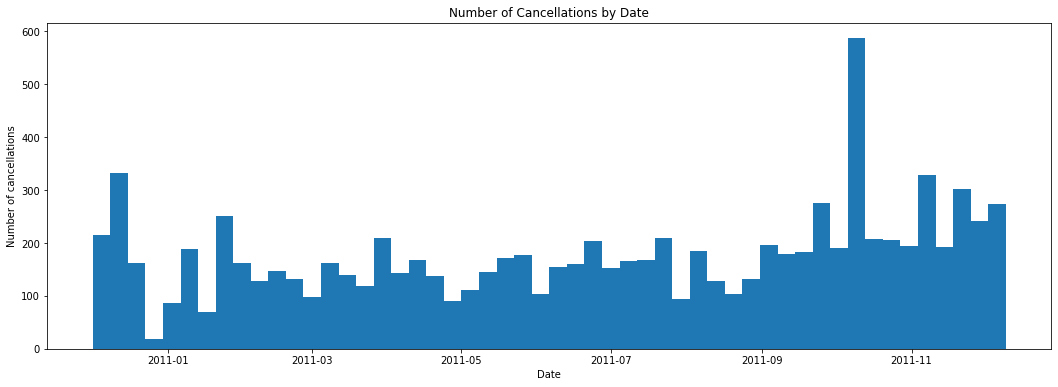

In [8]:
_ = plt.figure(figsize=[18,6])
_ = plt.hist(cancelled['InvoiceDate'], bins=52)
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of cancellations')
_ = plt.title('Number of Cancellations by Date')
plt.show()

I notice that there is a peak well above the rest around 2011-10. I looked a little closer to try to find a more specific range.

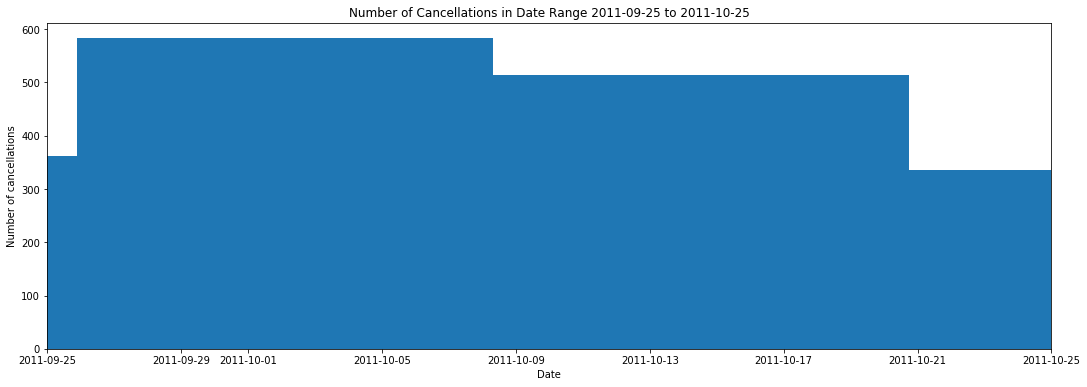

In [9]:
min_date = np.datetime64('2011-09-25')
max_date = np.datetime64('2011-10-25')
_ = plt.figure(figsize=[18,6])
_ = plt.hist(cancelled['InvoiceDate'], bins=30)
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of cancellations')
_ = plt.title('Number of Cancellations in Date Range 2011-09-25 to 2011-10-25')
_ = plt.xlim(min_date, max_date)
plt.show()

I wanted to see if those spikes coincided with holidays at all (which would likely be times of increased gift purchasing. I made an excel spreadsheet from the UK holidays listed on this website: https://www.timeanddate.com/holidays/uk/2011

In [10]:
holidays = pd.read_excel('Holidays.xlsx')
holidays.head()

,Date,DayOfWeek,Name,Type,Details
0,2011-01-01,Saturday,New Year's Day,Bank holiday,NaN
1,2011-01-03,Monday,New Year's Day observed,Bank holiday,NaN
2,2011-01-03,Monday,New Year's Day Holiday,Bank holiday,NaN
3,2011-01-04,Tuesday,2nd January (substitute day),Local Bank Holiday,Scotland
4,2011-01-06,Thursday,Epiphany,Christian,NaN


In [11]:
holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 5 columns):
Date         95 non-null datetime64[ns]
DayOfWeek    95 non-null object
Name         95 non-null object
Type         95 non-null object
Details      10 non-null object
dtypes: datetime64[ns](1), object(4)
memory usage: 3.8+ KB


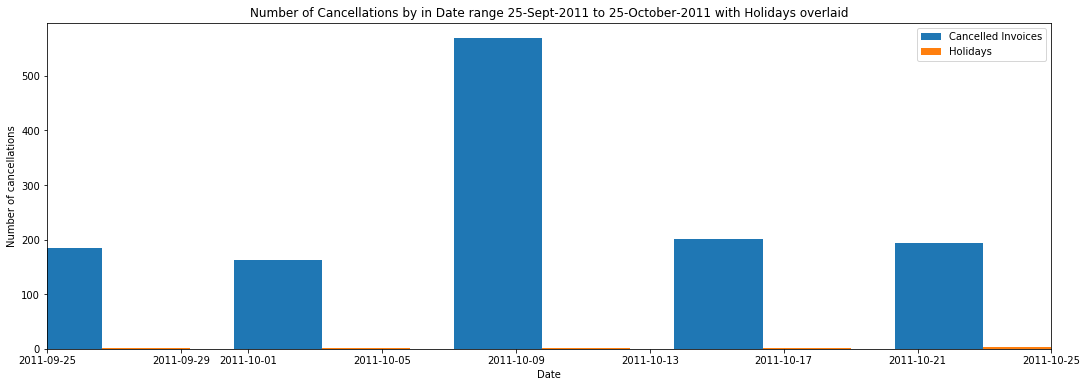

In [12]:
_ = plt.figure(figsize=[18,6])
_ = plt.hist([cancelled['InvoiceDate'], holidays['Date']], bins=60, label=['Cancelled Invoices', 'Holidays'])
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of cancellations')
_ = plt.title('Number of Cancellations by in Date range 25-Sept-2011 to 25-October-2011 with Holidays overlaid')
_ = plt.legend(loc='upper right')
_ = plt.xlim(min_date, max_date)
plt.show()

I found which holiday(s) are in the the range of 09-October-2011. Looks like primarily Jewish holidays which are not tied with gift giving. 

In [13]:
holidays_by_date = holidays.set_index(['Date'])
holidays_by_date.loc['2011-09-25':'2011-10-21']

,DayOfWeek,Name,Type,Details
Date,,,,
2011-09-28,Wednesday,Navaratri,Hindu Holiday,NaN
2011-09-29,Thursday,Rosh Hashana,Jewish holiday,NaN
2011-10-04,Tuesday,Feast of St Francis of Assisi,Christian,NaN
2011-10-06,Thursday,Dussehra,Hindu Holiday,NaN
2011-10-08,Saturday,Yom Kippur,Jewish holiday,NaN
2011-10-13,Thursday,First day of Sukkot,Jewish holiday,NaN
2011-10-19,Wednesday,Hoshana Rabbah,Jewish holiday,NaN
2011-10-20,Thursday,Shemini Atzeret,Jewish holiday,NaN
2011-10-21,Friday,Simchat Torah,Jewish holiday,NaN


I also looked at the holidays 30 days prior to see if there was anything of note.

In [14]:
holidays_by_date.loc['2011-08-25':'2011-09-25']

,DayOfWeek,Name,Type,Details
Date,,,,
2011-08-26,Friday,Laylatul Qadr (Night of Power),Muslim,NaN
2011-08-29,Monday,Summer Bank Holiday,Common local holiday,"ENG, NIR, WAL"
2011-08-31,Wednesday,Eid ul Fitr,Muslim,NaN
2011-09-01,Thursday,Ganesh Chaturthi,Hindu Holiday,NaN
2011-09-23,Friday,September Equinox,Season,NaN


None of those seem like likely reasons for the big spike in returns. I completed a brief search for top news stories in the UK around that time and found that unemployment was having “the largest increase in nearly two years” which may be a contributing factor. 
https://www.bbc.com/news/business-14912236

I looked to see if there was a day of the week that seemed to correspond to more (or fewer) cancellations than the others. First I added a column to correspond to day of the week, noting from the documentation that Monday=0 to Sunday=6

When I attempted this, the days of the week were not accurate. I reset the index on the cancelled data frame to see if this was this issue, and that seemed to fix it.

In [15]:
cancelled = cancelled.reset_index(drop=True)
cancelled['Weekday'] = cancelled['InvoiceDate'].dt.weekday_name

#returns an integer of day of week: Monday=0 to Sunday=6
cancelled['WeekdayNum'] = cancelled['InvoiceDate'].dt.weekday

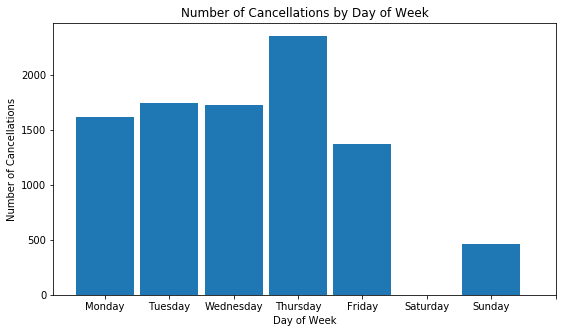

In [16]:
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_int = [0,1,2,3,4,5,6,7]
_ = plt.figure(figsize=[9,5])
_ = plt.hist(cancelled['WeekdayNum'], bins=weekday_int, align='left', rwidth=0.9)
_ = plt.xticks(ticks=weekday_int, labels=days_of_week)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Number of Cancellations')
_ = plt.title('Number of Cancellations by Day of Week')
plt.show()

From the looks of the plot, the most returns happen on a Thursday and no returns happened on Saturday. I did a search for this, because this felt suspect, however no results came up for cancelled invoices on a Saturday

In [17]:
cancelled.loc[cancelled['Weekday'] =='Saturday']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Weekday,WeekdayNum


In [18]:
monday_c = cancelled['Weekday'] =='Monday'
tuesday_c = cancelled['Weekday'] =='Tuesday'
wednesday_c = cancelled['Weekday'] =='Wednesday'
thursday_c = cancelled['Weekday'] =='Thursday'
friday_c = cancelled['Weekday'] =='Friday'
saturday_c = cancelled['Weekday'] =='Saturday'
sunday_c = cancelled['Weekday'] =='Sunday'

In [19]:
print('ANOVA for all days of week:', stats.f_oneway(monday_c, tuesday_c, wednesday_c, thursday_c, friday_c, saturday_c, sunday_c))

ANOVA for all days of week: F_onewayResult(statistic=617.5717931790023, pvalue=0.0)


For this, we can say that there it is statistically unlikely that the difference observed between all days of the week was due to chance.

I noted that there are 9288 cancelled orders, so I pulled out the top 20 most commonly cancelled orders. 

In [20]:
can_top20_count = cancelled['Description'].value_counts().head(20)
can_top20_count

Manual                                 244
REGENCY CAKESTAND 3 TIER               181
POSTAGE                                126
JAM MAKING SET WITH JARS                87
Discount                                77
SET OF 3 CAKE TINS PANTRY DESIGN        74
SAMPLES                                 61
STRAWBERRY CERAMIC TRINKET BOX          55
ROSES REGENCY TEACUP AND SAUCER         54
RECIPE BOX PANTRY YELLOW DESIGN         47
WOOD 2 DRAWER CABINET WHITE FINISH      45
LUNCH BAG RED RETROSPOT                 44
JUMBO BAG RED RETROSPOT                 44
WHITE HANGING HEART T-LIGHT HOLDER      42
RED RETROSPOT CAKE STAND                42
GREEN REGENCY TEACUP AND SAUCER         42
SMALL GLASS HEART TRINKET POT           40
SET OF 3 REGENCY CAKE TINS              37
POPCORN HOLDER                          36
SET OF TEA COFFEE SUGAR TINS PANTRY     35
Name: Description, dtype: int64

In [21]:
can_top20 = pd.DataFrame(can_top20_count).reset_index()
#renaming columns to better represent the description and their value counts
can_top20 = can_top20.rename(columns={"index":"Description", "Description":"ValueCount"})
can_top20

,Description,ValueCount
0,Manual,244
1,REGENCY CAKESTAND 3 TIER,181
2,POSTAGE,126
3,JAM MAKING SET WITH JARS,87
4,Discount,77
5,SET OF 3 CAKE TINS PANTRY DESIGN,74
6,SAMPLES,61
7,STRAWBERRY CERAMIC TRINKET BOX,55
8,ROSES REGENCY TEACUP AND SAUCER,54
9,RECIPE BOX PANTRY YELLOW DESIGN,47


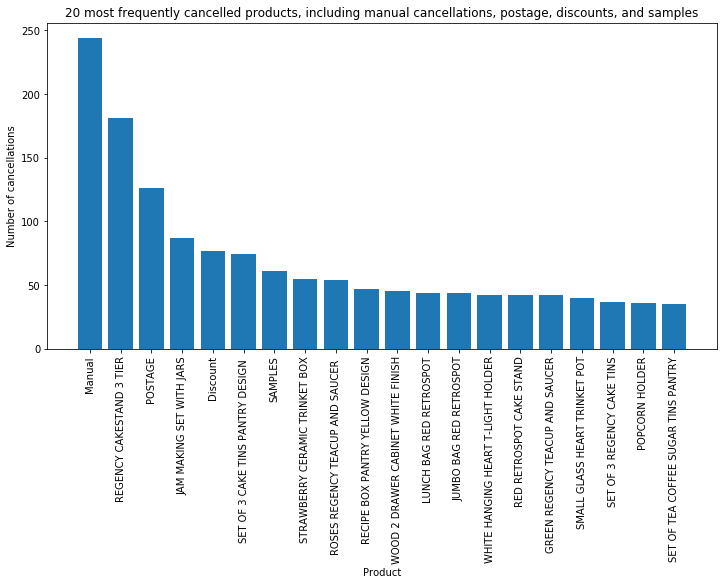

In [22]:
_ = plt.figure(figsize=[12,6])
_ = plt.bar(can_top20['Description'], height=can_top20['ValueCount'])
_ = plt.xlabel('Product')
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of cancellations')
_ = plt.title('20 most frequently cancelled products, including manual cancellations, postage, discounts, and samples')
plt.show()

### Observations:
- Notice that "Manual" is the most common...wonder if this is a manual return? 
- postage, discount, and samples high on list. 
    - Consider removing discount? 
    - Determine if certain products more frequently receive discounts?
        - may not be able to determine as discounts are not tied to which product?
    - Same line of thought with samples
- question if postage is a product sold or if this represents postage paid out?
- graph above represents products most frequently appearing on cancellation list. Does not account for numbers returned

I looked to see if manual cancellation was more common during a given time of year. I pulled only the manually cancelled invoices and noted that the number of rows is consistent with the number of manual cancels from the top 20 list, so I feel confident that I grabbed them all

In [23]:
manual = cancelled.loc[cancelled['Description'].str.contains('Manual', na=False)]
manual

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Weekday,WeekdayNum
174,C537610,M,Manual,-1,2010-12-07 13:23:00,631.31,NaN,United Kingdom,Tuesday,1
176,C537613,M,Manual,-1,2010-12-07 13:28:00,313.78,NaN,United Kingdom,Tuesday,1
325,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.0,United Kingdom,Thursday,3
329,C538189,M,Manual,-1,2010-12-10 10:35:00,133.08,NaN,United Kingdom,Friday,4
429,C538681,M,Manual,-1,2010-12-13 17:12:00,316.30,NaN,United Kingdom,Monday,0
...,...,...,...,...,...,...,...,...,...,...
9033,C580263,M,Manual,-16,2011-12-02 12:43:00,0.29,12536.0,France,Friday,4
9057,C580510,M,Manual,-1,2011-12-04 13:48:00,1.25,14456.0,United Kingdom,Sunday,6
9185,C581009,M,Manual,-1,2011-12-07 09:15:00,125.00,16971.0,United Kingdom,Wednesday,2
9201,C581145,M,Manual,-1,2011-12-07 13:48:00,9.95,17490.0,United Kingdom,Wednesday,2


I plotted the quantity of manual cancellations versus time. This shows total number of products cancelled, but may be misleading, as a single order of high quantity could easily skew the data. 

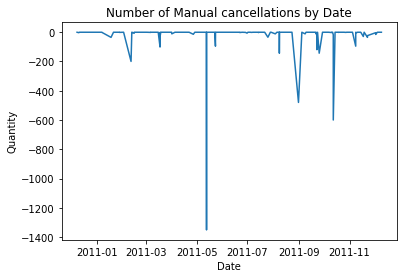

In [24]:
_ = plt.plot(manual['InvoiceDate'], manual['Quantity'])
_ = plt.xlabel('Date')
_ = plt.ylabel('Quantity')
_ = plt.title('Number of Manual cancellations by Date')
plt.show()

I then looked at a histogram of cancellations, to get a better sense of when cancellations are most frequently occuring. I selected 52 bins as there are 52 weeks in the year 

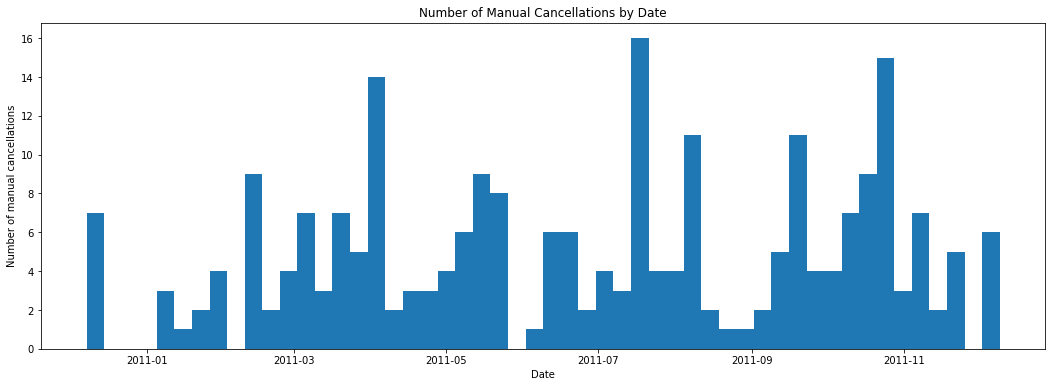

In [25]:
_ = plt.figure(figsize=[18,6])
_ = plt.hist(manual['InvoiceDate'], bins=52)
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of manual cancellations')
_ = plt.title('Number of Manual Cancellations by Date')
plt.show()

Again, I plotted this against holidays

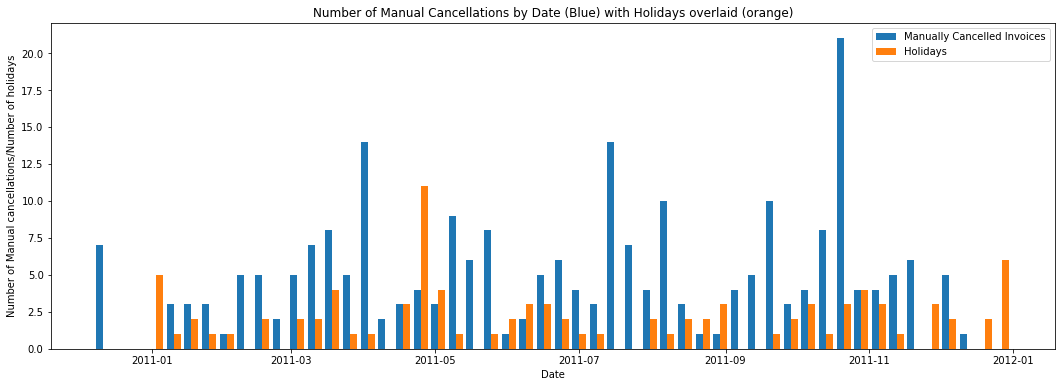

In [26]:
_ = plt.figure(figsize=[18,6])
_ = plt.hist([manual['InvoiceDate'], holidays['Date']], bins=52, label=['Manually Cancelled Invoices', 'Holidays'])
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of Manual cancellations/Number of holidays')
_ = plt.title('Number of Manual Cancellations by Date (Blue) with Holidays overlaid (orange)')
_ = plt.legend(loc='upper right')
plt.show()

Looks like two of the highest cancellation times coincide with holidays

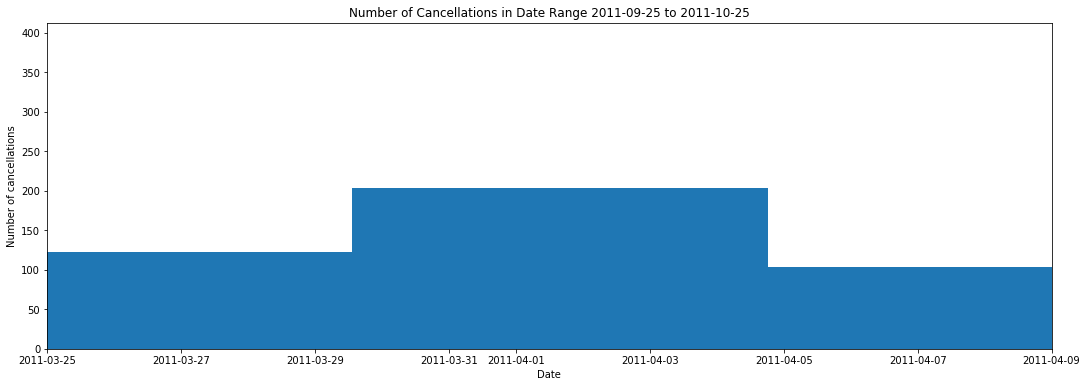

In [27]:
min_date_march = np.datetime64('2011-03-25')
max_date_april = np.datetime64('2011-04-09')
_ = plt.figure(figsize=[18,6])
_ = plt.hist(cancelled['InvoiceDate'], bins=60)
_ = plt.xlabel('Date')
_ = plt.ylabel('Number of cancellations')
_ = plt.title('Number of Cancellations in Date Range 2011-09-25 to 2011-10-25')
_ = plt.xlim(min_date_march, max_date_april)
plt.show()

In [28]:
holidays_by_date = holidays.set_index(['Date'])
holidays_by_date.loc['2011-03-25':'2011-04-09']

,DayOfWeek,Name,Type,Details
Date,,,,
2011-03-27,Sunday,Daylight Saving Time starts,Clock change/Daylight Saving Time,NaN
2011-04-03,Sunday,Mothering Sunday,Observance,NaN


a quick google search suggests that Mothering Sunday is not the same as mother's day and is a Christian holiday. We know from the looking at the manual cancellations that there is not a holiday of note in the November time-frame

If we assume that "manual" is an override that doesn't differentiate into individual products, that samples shouldn't be counted, and that discounts and postage are not to be included, then the top 20 most cancelled products looks more like this:

In [29]:
#adding additional rows
#decided to add 30 rows to account for ties: can_prod_count for cancelled products
can_prod_count = cancelled['Description'].value_counts().head(30)
can_prod = pd.DataFrame(can_prod_count).reset_index()
#renaming columns to better represent the description and their value counts
can_prod = can_prod.rename(columns={"index":"Description", "Description":"ValueCount"})
#dropping rows for manual, postage, discount, samples and re-setting the index
can_prod = can_prod.drop([0,2,4,6]).reset_index(drop=True)
#selecting top 20 from new list
#I did look at the top 25 to make sure my final item was not in a tie with the next item. It is not, so I selected only the top 20 products again
can_prod = can_prod.head(20)
can_prod

,Description,ValueCount
0,REGENCY CAKESTAND 3 TIER,181
1,JAM MAKING SET WITH JARS,87
2,SET OF 3 CAKE TINS PANTRY DESIGN,74
3,STRAWBERRY CERAMIC TRINKET BOX,55
4,ROSES REGENCY TEACUP AND SAUCER,54
5,RECIPE BOX PANTRY YELLOW DESIGN,47
6,WOOD 2 DRAWER CABINET WHITE FINISH,45
7,LUNCH BAG RED RETROSPOT,44
8,JUMBO BAG RED RETROSPOT,44
9,WHITE HANGING HEART T-LIGHT HOLDER,42


Now, a hopefully more accurate picture of the top 20 most cancelled products would look like this:

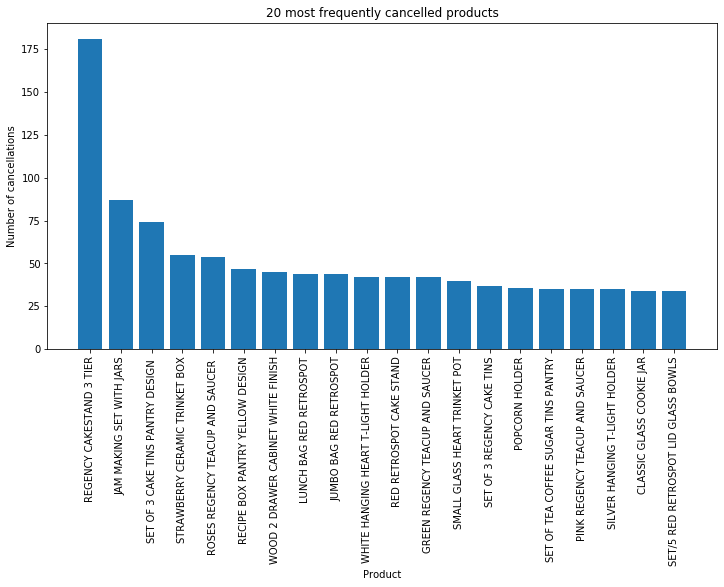

In [30]:
_ = plt.figure(figsize=[12,6])
_ = plt.bar(can_prod['Description'], height=can_prod['ValueCount'])
_ = plt.xlabel('Product')
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of cancellations')
_ = plt.title('20 most frequently cancelled products')
plt.show()

I wanted to look at if there is a customer that cancels orders more frequently. I realized that I was using similar code, so I wrote a function to pull the top n values of a given column

In [31]:
can_cust = get_top_nums(cancelled, 'CustomerID', 10)
can_cust

,CustomerID,ValueCount
0,14911.0,226
1,17841.0,136
2,17511.0,113
3,15311.0,112
4,12607.0,101
5,14410.0,93
6,13798.0,90
7,14606.0,82
8,13113.0,79
9,12471.0,71


Looks like customer 14911 has almost 100 more cancelled orders than the next most common customer. I dug in and looked at what they were ordering, to see if there is a pattern

In [32]:
can_cust_1 = cancelled.loc[cancelled['CustomerID']==14911.0]
can_cust_1

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Weekday,WeekdayNum
556,C539221,90185B,AMETHYST DIAMANTE EXPANDABLE RING,-3,2010-12-16 12:56:00,4.25,14911.0,EIRE,Thursday,3
557,C539221,90185C,BLACK DIAMANTE EXPANDABLE RING,-4,2010-12-16 12:56:00,4.25,14911.0,EIRE,Thursday,3
558,C539221,22592,CARDHOLDER HOLLY WREATH METAL,-1,2010-12-16 12:56:00,3.75,14911.0,EIRE,Thursday,3
559,C539221,22941,CHRISTMAS LIGHTS 10 REINDEER,-12,2010-12-16 12:56:00,8.50,14911.0,EIRE,Thursday,3
560,C539221,22942,CHRISTMAS LIGHTS 10 SANTAS,-10,2010-12-16 12:56:00,8.50,14911.0,EIRE,Thursday,3
...,...,...,...,...,...,...,...,...,...,...
8542,C577388,23454,THREE MINI HANGING FRAMES,-2,2011-11-18 16:58:00,4.15,14911.0,EIRE,Friday,4
8543,C577388,21429,RED GINGHAM ROSE JEWELLERY BOX,-2,2011-11-18 16:58:00,1.95,14911.0,EIRE,Friday,4
8544,C577388,23118,PARISIENNE JEWELLERY DRAWER,-1,2011-11-18 16:58:00,7.50,14911.0,EIRE,Friday,4
8629,C577828,23318,BOX OF 6 MINI VINTAGE CRACKERS,-11,2011-11-22 09:53:00,2.08,14911.0,EIRE,Tuesday,1


I also looked at the countries that cancel most frequently. Since it is a UK-based company, having the most cancellations in-country makes sense.

In [33]:
can_country = get_top_nums(cancelled, 'Country', 5)
can_country

,Country,ValueCount
0,United Kingdom,7856
1,Germany,453
2,EIRE,302
3,France,149
4,USA,112


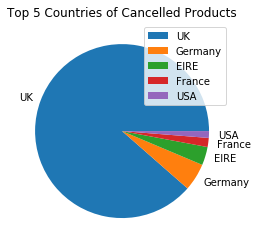

In [34]:
#pie chart of country data above
_ = plt.pie(can_country['ValueCount'], labels=['UK', 'Germany', 'EIRE', 'France', 'USA'])
_ = plt.title('Top 5 Countries of Cancelled Products')
_ = plt.legend()
plt.show()

## Purchased products analysis

In addition to cancelled orders, I wanted to look at which products are most and least commonly purchased. I started by removing the cancelled products from the retail dataframe to avoid including these products. 

In [35]:
purchased = retail.drop(retail[retail['InvoiceNo'].str.contains('C', na=False)].index)
purchased.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [36]:
purchased.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 532621 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      532621 non-null object
StockCode      532621 non-null object
Description    531167 non-null object
Quantity       532621 non-null int64
InvoiceDate    532621 non-null datetime64[ns]
UnitPrice      532621 non-null float64
CustomerID     397924 non-null float64
Country        532621 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.6+ MB


quick math from the original retail dataframe number of entries minus cancelled dataframe number of entries shows me that this dataframe has the expected number of entries. 

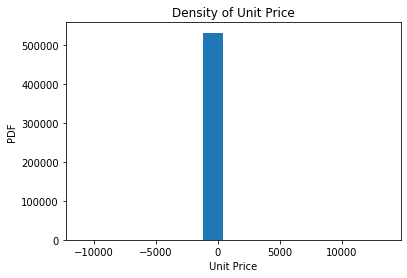

In [37]:
#I looked at the purchased data to see if the prices of products was in a normal distribution
_ = plt.hist(purchased['UnitPrice'], bins=15)
_ = plt.xlabel("Unit Price")
_ = plt.ylabel("PDF")
_ = plt.title("Density of Unit Price")
plt.show()

I noticed in the above that the unit price seemed to skew negative, even though I should have removed all the negative numbers (which would have corresponded to cancelled invoices). I looked for unit prices below 0 and found the following:

In [38]:
negative = purchased.loc[purchased['UnitPrice'] < 0]
negative

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
299983,A563186,B,Adjust bad debt,1,2011-08-12 14:51:00,-11062.06,NaN,United Kingdom
299984,A563187,B,Adjust bad debt,1,2011-08-12 14:52:00,-11062.06,NaN,United Kingdom


Difficult to say what this product description is referring to. This would definitely be something I would ask the client about to better understand what this is referring to and how it relates to the work I am attempting. 

I wanted to make sure these were outliers, so I created a box plot and calculated the z-scores. 

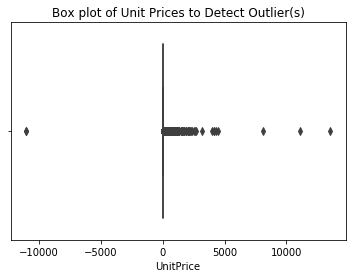

In [39]:
_ = sns.boxplot(x=purchased['UnitPrice'])
_ = plt.title('Box plot of Unit Prices to Detect Outlier(s)')
plt.show()

There certainly seems to be an outlier at around -10,000, which I suspected. There also seem to be at least 3 points on the high end that may be outliers as well. I looked for these and found that there is a similar charge that would negate the "adjust bad credit" on the negative end as well as an Amazon fee and postage which don't really correspond to product prices.

In [40]:
high = purchased.loc[purchased['UnitPrice'] > 5000]
high

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
15017,537632,AMAZONFEE,AMAZON FEE,1,2010-12-07 15:08:00,13541.33,NaN,United Kingdom
173382,551697,POST,POSTAGE,1,2011-05-03 13:46:00,8142.75,16029.0,United Kingdom
299982,A563185,B,Adjust bad debt,1,2011-08-12 14:50:00,11062.06,NaN,United Kingdom


Looking at which data points have a z-score of greater than -3 or 3 (which would indicate outliers), we get the following:

In [41]:
z = np.abs(stats.zscore(purchased['UnitPrice']))
print(np.where(z > 3))
print("Outliers: ", len(z))

(array([   237,   1802,   3015,   4919,   5370,   5605,   6085,  10710,
        11279,  13775,  14238,  14839,  15472,  15701,  15807,  15931,
        16053,  16595,  18324,  19193,  19194,  21045,  21621,  21734,
        21860,  22788,  24536,  24771,  26857,  27506,  30352,  30405,
        30471,  31936,  34206,  35050,  35566,  35865,  36471,  37645,
        38129,  38655,  39086,  39205,  39602,  39680,  39790,  39883,
        39957,  39998,  40151,  40203,  40739,  41331,  42246,  43342,
        44378,  45526,  46917,  47543,  49823,  50487,  50706,  50958,
        52197,  52610,  53653,  53857,  54588,  54836,  55495,  56064,
        56108,  56856,  59341,  59531,  59909,  60243,  61399,  61572,
        61858,  62923,  64336,  64789,  65540,  65578,  65847,  66350,
        67350,  67702,  68103,  68765,  69016,  70120,  71270,  71316,
        72022,  72170,  73674,  74859,  75010,  75075,  75577,  77502,
        78157,  78158,  78263,  78563,  79484,  80230,  80272,  80512,
     

I do notice that this suggests every data point in the purchased data frame is an outlier, which doesn't seem particularly accurate. 

This will be addressed after I remove the stock codes that don't correspond to products.

We learned beforehand that postage, Amazon fees, and adjust bad debt were included in the purchased dataframe and perhaps should not have been. I looked at these items (commented out for space saving) and removed them from my data frame to get a better look at the products only.

I later found that dotcom postage and "Manual" was also included in this list and added it to the rows that I would drop.

In [42]:
#purchased.loc[purchased['StockCode'] == 'POST']

In [43]:
#purchased.loc[purchased['StockCode'] == 'AMAZONFEE']

In [44]:
#purchased.loc[purchased['StockCode'] == 'B']

In [45]:
purchased.drop(purchased[purchased['StockCode'] == 'POST'].index, inplace=True)
purchased.drop(purchased[purchased['StockCode'] == 'AMAZONFEE'].index, inplace=True)
purchased.drop(purchased[purchased['StockCode'] == 'B'].index, inplace=True)
purchased.drop(purchased[purchased['StockCode'] == 'DOT'].index, inplace=True)
purchased.drop(purchased[purchased['StockCode'] == 'M'].index, inplace=True)

In [46]:
#new outlier calculation
new_outlier = np.abs(stats.zscore(purchased['UnitPrice']))
print(np.where(new_outlier > 3))
print("New outliers: ", len(new_outlier))

(array([   151,    165,    236, ..., 530028, 530076, 530082], dtype=int64),)
New outliers:  530450


 This removed around 2200 data points, but will likely be closer to giving information only on the products, rather than other fees or whatever is occuring with the bad debt adjustment. I then created a box plot as before as well as a box plot using a log scale to attempt to better visualize the data and potential outliers. 

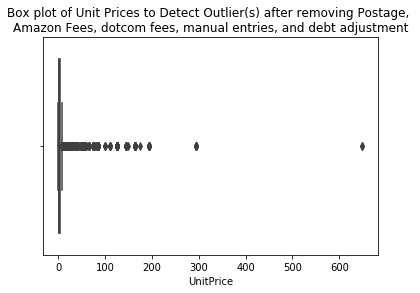

In [47]:
_ = sns.boxplot(x=purchased['UnitPrice'])
_ = plt.title('Box plot of Unit Prices to Detect Outlier(s) after removing Postage, \nAmazon Fees, dotcom fees, manual entries, and debt adjustment')
plt.show()

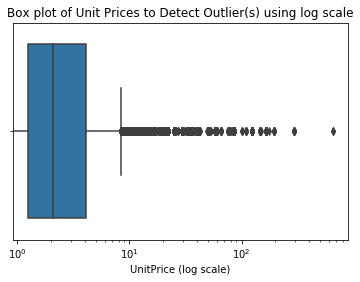

In [48]:
f, ax = plt.subplots()
sns.boxplot(x=purchased['UnitPrice'])
ax.set_xscale('log')
plt.xlabel('UnitPrice (log scale)')
plt.title('Box plot of Unit Prices to Detect Outlier(s) using log scale')
plt.show()

From this graph, it would appear that statistically, most of the proucts lie in the 0-10 Pound range. If we only looked at these products, we would still have over 500,000 products in our dataframe

In [49]:
normal = purchased.loc[purchased['UnitPrice'] < 10]
normal.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 508389 entries, 0 to 541908
Data columns (total 8 columns):
InvoiceNo      508389 non-null object
StockCode      508389 non-null object
Description    506940 non-null object
Quantity       508389 non-null int64
InvoiceDate    508389 non-null datetime64[ns]
UnitPrice      508389 non-null float64
CustomerID     386824 non-null float64
Country        508389 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 34.9+ MB


A histogram of this data (those unit prices less than 10) yields the following plot, which is still right tailed. This means that my data will likely be skewed high, even after taking into account and removing some of the higher items, like postage, fees, debt adjustments, and manual entries.  

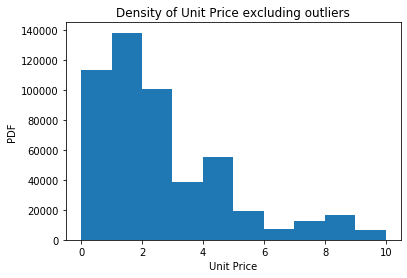

In [50]:
_ = plt.hist(normal['UnitPrice'])
_ = plt.xlabel("Unit Price")
_ = plt.ylabel("PDF")
_ = plt.title("Density of Unit Price excluding outliers")
plt.show()

I looked next at the day of the week that products were purchased on. This is similar to the work I did for cancelled products above. 

Again, there were no purchased products on Saturday. Perhaps the store is closed on Saturdays?

C:\Users\brittany\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\brittany\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


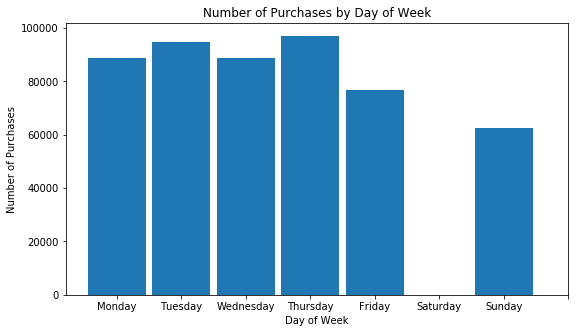

In [51]:
normal['Weekday'] = normal['InvoiceDate'].dt.weekday_name

#returns an integer of day of week: Monday=0 to Sunday=6
normal['WeekdayNum'] = normal['InvoiceDate'].dt.weekday

weekday_int = [0,1,2,3,4,5,6,7]
_ = plt.figure(figsize=[9,5])
_ = plt.hist(normal['WeekdayNum'], bins=weekday_int, align='left', rwidth=0.9)
_ = plt.xticks(ticks=weekday_int, labels=days_of_week)
_ = plt.xlabel('Day of Week')
_ = plt.ylabel('Number of Purchases')
_ = plt.title('Number of Purchases by Day of Week')
plt.show()

In [52]:
normal.loc[normal['Weekday'] =='Saturday']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Weekday,WeekdayNum


In [53]:
monday = normal['Weekday'] =='Monday'
tuesday = normal['Weekday'] =='Tuesday'
wednesday = normal['Weekday'] =='Wednesday'
thursday = normal['Weekday'] =='Thursday'
friday = normal['Weekday'] =='Friday'
saturday = normal['Weekday'] =='Saturday'
sunday = normal['Weekday'] =='Sunday'

In [54]:
print('ANOVA for all days of week for purchased products:', stats.f_oneway(monday, tuesday, wednesday, thursday, friday, saturday, sunday))

ANOVA for all days of week for purchased products: F_onewayResult(statistic=19356.842919512223, pvalue=0.0)


The ANOVA suggests that there the variance we see is not due to chance. 

For an informative look, I also looked at the top 20 purchased products and plotted those

In [55]:
top_20_bought = get_top_nums(normal, 'Description', 20)
top_20_bought

,Description,ValueCount
0,WHITE HANGING HEART T-LIGHT HOLDER,2327
1,JUMBO BAG RED RETROSPOT,2115
2,LUNCH BAG RED RETROSPOT,1594
3,ASSORTED COLOUR BIRD ORNAMENT,1489
4,PARTY BUNTING,1466
5,PACK OF 72 RETROSPOT CAKE CASES,1370
6,LUNCH BAG BLACK SKULL.,1328
7,NATURAL SLATE HEART CHALKBOARD,1263
8,JUMBO BAG PINK POLKADOT,1238
9,HEART OF WICKER SMALL,1226


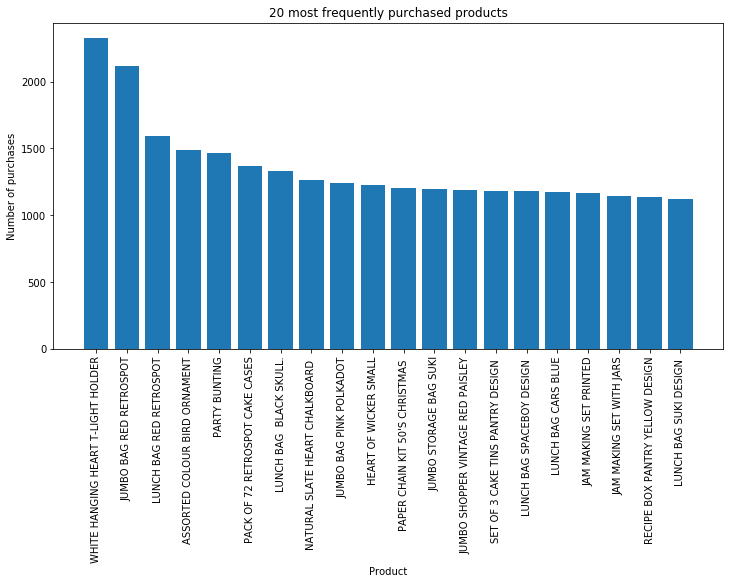

In [56]:
_ = plt.figure(figsize=[12,6])
_ = plt.bar(top_20_bought['Description'], height=top_20_bought['ValueCount'])
_ = plt.xlabel('Product')
_ = plt.xticks(rotation=90)
_ = plt.ylabel('Number of purchases')
_ = plt.title('20 most frequently purchased products')
plt.show()

I checked to see if any of the top purchased products were also in the top cancelled products by using an inner join. There were no products that made the top 20 of boths lists.

In [58]:
common = can_top20.merge(top_20_bought, how='inner', on='Description')
common

,Description,ValueCount_x,ValueCount_y
0,JAM MAKING SET WITH JARS,87,1142
1,SET OF 3 CAKE TINS PANTRY DESIGN,74,1182
2,RECIPE BOX PANTRY YELLOW DESIGN,47,1133
3,LUNCH BAG RED RETROSPOT,44,1594
4,JUMBO BAG RED RETROSPOT,44,2115
5,WHITE HANGING HEART T-LIGHT HOLDER,42,2327
